<h1>IBM Machine Learning with Python</h1>

<h2>Intro to machine learning</h2>
<p><b>Machine Learning</b> is the subfield of computer science that gives <b>"computers te ability to learn without being explicitly programmed."</b></p>

<p>-Arthur Samuel(1959)</p>

<h2>How Machine Learning works</h2>
<img src='https://www.researchgate.net/publication/349634676/figure/fig1/AS:995453013352451@1614345901769/Machine-learning-techniques-work-7.jpg'/>

<h2>Major Machine Learning techniques</h2>
<br>
<b style='color : orange'>Regression/Estimation</b>
<li style='color : blue'>Prediccting continuous values</li>
<b style='color : orange'>Classification</b>
<li style='color : blue'>Predicting the items class/category of case</li>
<b style='color : orange'>Clustering</b>
<li style='color : blue'>Finding the structure of data; summarization</li>
<b style='color : orange'>Associations</b>
<li style='color : blue'>Associating frequent co-occurring items/events</li>
<br>
<b style='color : orange'>Anomly detection</b>
<li style='color : blue'>Discovering abnormal and unusual cases</li>
<b style='color : orange'>Sequence mining</b>
<li style='color : blue'>Predicting next events; click stream(markov model,HMM)</li>
<b style='color : orange'>Dimension Reduction</b>
<li style='color : blue'>Reducing the size of data(PCA)</li>
<b style='color : orange'>Recommendation systems</b>
<li style='color : blue'>Recommending items</li>

<h2>Supervised vs unsupervised learning</h2>

<b style=''>Supervised</b>
<li style='color : blue'>We teach the model by training it with some data from a labeled dataset. it's important to note that the data is labeled</li>
<b>Classification</b>: is the process of predicting a discrete class label or category.
<br>
<b>Regression</b>: is the process of predicting a continuous value as opposed to predicting categorial value in calssification.
<br>
<br>
<b style=''>Unsupervised</b>
<li style='color : blue'>it means, the unsupervised algorithm trains on the dataset, and draws conclusions on unlabeled data</li>
<b>Clustering</b>: find patterns and group from unlabeled data.

<h1>Into to regression</h1>
<img src='https://miro.medium.com/max/2872/1*k2bLmeYIG7z7dCyxADedhQ.png'/>

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

<h3>Description dataset</h3>

MODELYEAR e.g. 2014
<br>
MAKE e.g. Acura<br>
MODEL e.g. ILX<br>
VEHICLE CLASS e.g. SUV<br>
ENGINE SIZE e.g. 4.7<br>
CYLINDERS e.g 6<br>
TRANSMISSION e.g. A6<br>
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9<br>
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9<br>
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2<br>
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0<br>

In [18]:
#import the data
df = pd.read_csv('./Desktop/FuelConsumption.csv')
df.head(5)

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [15]:
print(f'rows: {df.shape[0] } ')
print(f'columns: {df.shape[1] } ')

rows: 1067 
columns: 13 


In [16]:
#tipos de variables
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [21]:
#seleccion de variables
cars = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cars.head(5)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244

In [22]:
cars.describe()

ENGINESIZE    CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
count  1067.000000  1067.000000           1067.000000   1067.000000
mean      3.346298     5.794752             11.580881    256.228679
std       1.415895     1.797447              3.485595     63.372304
min       1.000000     3.000000              4.700000    108.000000
25%       2.000000     4.000000              9.000000    207.000000
50%       3.400000     6.000000             10.900000    251.000000
75%       4.300000     8.000000             13.350000    294.000000
max       8.400000    12.000000             25.800000    488.000000

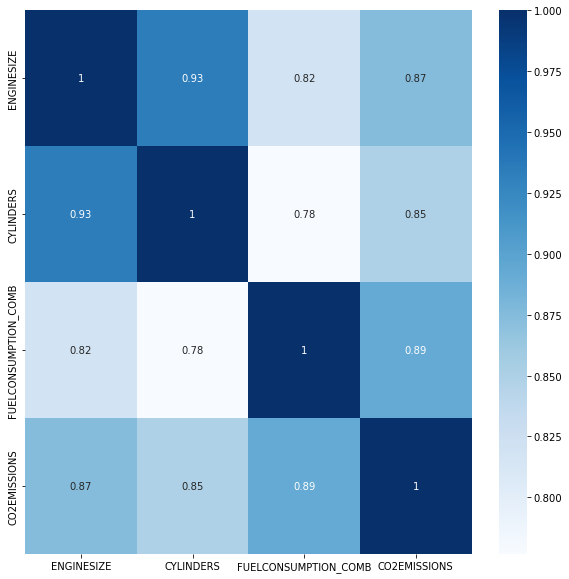

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(cars.corr(),annot=True,cmap='Blues')
plt.show()

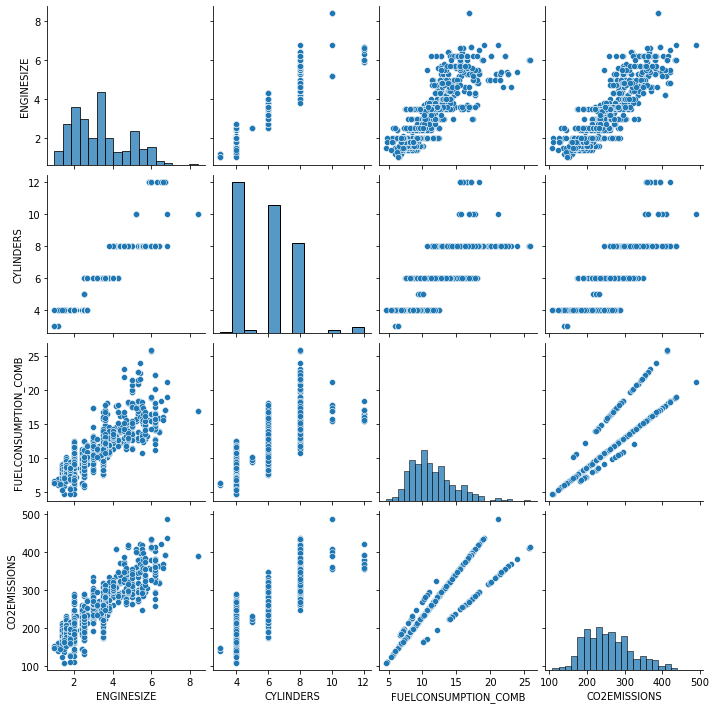

In [41]:
sns.pairplot(cars)

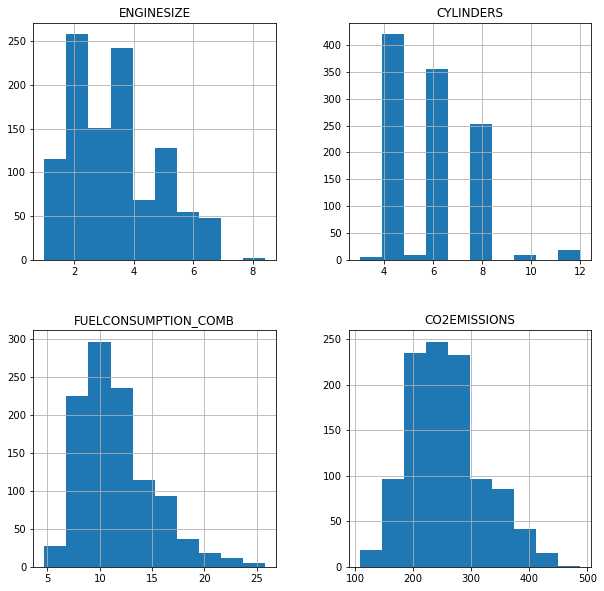

In [35]:
cars.hist(figsize=(10,10))
plt.show()

<h2>regresion lineal simple</h2>

In [69]:
X = np.array(cars['ENGINESIZE'])
y = cars['CO2EMISSIONS']

In [63]:
#MCO
#add ones columns 
X = np.array([np.ones(cars.shape[0]),X]).T
print(X)

[[1.  2. ]
 [1.  2.4]
 [1.  1.5]
 ...
 [1.  3. ]
 [1.  3.2]
 [1.  3.2]]


In [66]:
B = np.linalg.inv(X.T@X) @ X.T @ y
B

array([125.3040995 ,  39.12519979])

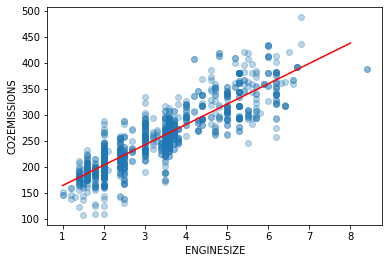

In [74]:
fig,ax = plt.subplots()
ax.scatter(X,y,alpha=0.3)
ax.plot([1,8],[B[0]+B[1]*1,B[0]+B[1]*8],c='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

<h2>Linear Regression</h2>

In [78]:
#features and target
X = cars.drop(['CO2EMISSIONS'],axis=1)
y = cars['CO2EMISSIONS']

In [80]:
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(853, 3) (853,) (214, 3) (214,)


In [83]:
model = LinearRegression().fit(X_train,y_train)
predicction = model.predict(X_test)
mse = mean_squared_error(y_test,predicction)
print(f'MSE : {mse}')

MSE : 512.8551370148303


Text(0, 0.5, 'score predict')

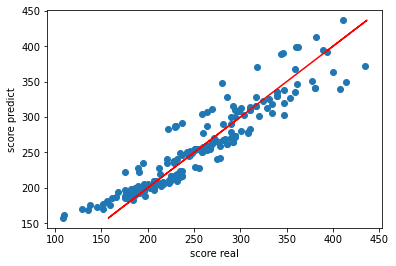

In [89]:
plt.scatter(y_test,predicction)
plt.plot(predicction,predicction,color='r')
plt.xlabel('score real')
plt.ylabel('score predict')

<h1>Non Linear Regression</h1>

<img src='https://miro.medium.com/max/1400/1*Bedu-lZjAwNFm-8zECtdcw.png' />

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures


In [35]:
df = pd.read_csv('./Desktop/FuelConsumption.csv')
df.head(5)

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [36]:
cars = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cars.head(5)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244

In [37]:
X = np.c_[cars['ENGINESIZE']]
y = np.c_[cars['CO2EMISSIONS']]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#polynomial feature
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v\_1\\\\
v\_2\\\\
\vdots\\\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
\[ 1 & v\_1 & v\_1^2]\\\\
\[ 1 & v\_2 & v\_2^2]\\\\
\vdots & \vdots & \vdots\\\\
\[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\\\
2.4\\\\
1.5\\\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
\[ 1 & 2. & 4.]\\\\
\[ 1 & 2.4 & 5.76]\\\\
\[ 1 & 1.5 & 2.25]\\\\
\vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$

In [38]:
model = LinearRegression().fit(train_x_poly,y_train)
print(f'coef : {model.coef_}')
print(f'intercept : {model.intercept_}' )

coef : [[ 0.         47.42976379 -1.12705382]]
intercept : [112.92021963]


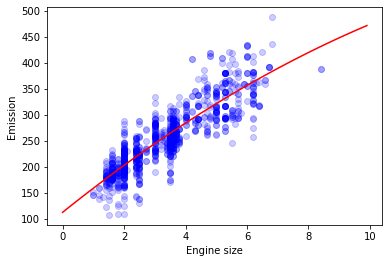

In [39]:
plt.scatter(cars.ENGINESIZE, cars.CO2EMISSIONS,  color='blue',alpha=0.2)
XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_[0]+ model.coef_[0][1]*XX+ model.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [40]:
from sklearn.metrics import r2_score

In [44]:
test_x_poly = poly.transform(X_test)
prediction = model.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,prediction ) )

Mean absolute error: 23.92
Residual sum of squares (MSE): 960.87
R2-score: 0.77


<h1>Clasification</h1>

<h2>Algorithmns in machine learning</h2>
<br>
<li style='color : blue'>Desicion Trees</li>
<li style='color : blue'>Naive bayes</li>
<li style='color : blue'>Linear Descriminant Analysis</li>
<li style='color : blue'>K-nearest Neighbor</li>
<li style='color : blue'>Logistic Regression</li>
<li style='color : blue'>Neural Networks</li>
<li style='color : blue'>Support Vector Machines(SVM)</li>

<h2>K-neares Neighbors</h2>

<b>Classification accuracy</b>
<p>F1-score,jacard index,Log loss</p>

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.




In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [50]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

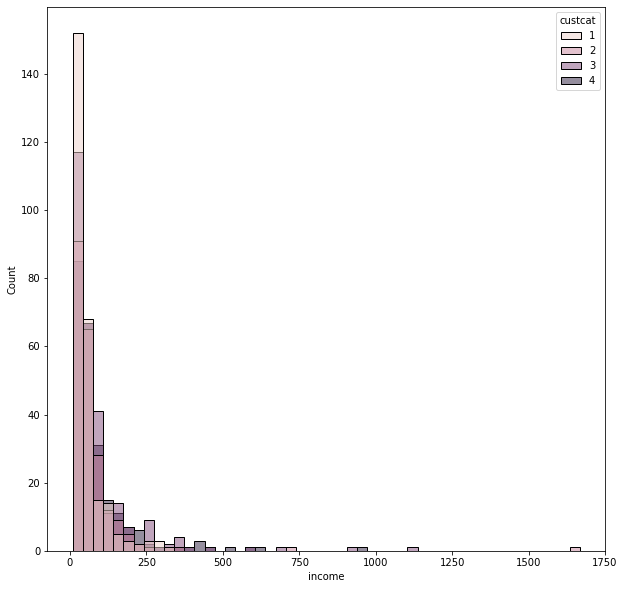

In [76]:
plt.figure(figsize=(10,10))
sns.histplot(df,x='income',hue='custcat',bins=50)
plt.show()

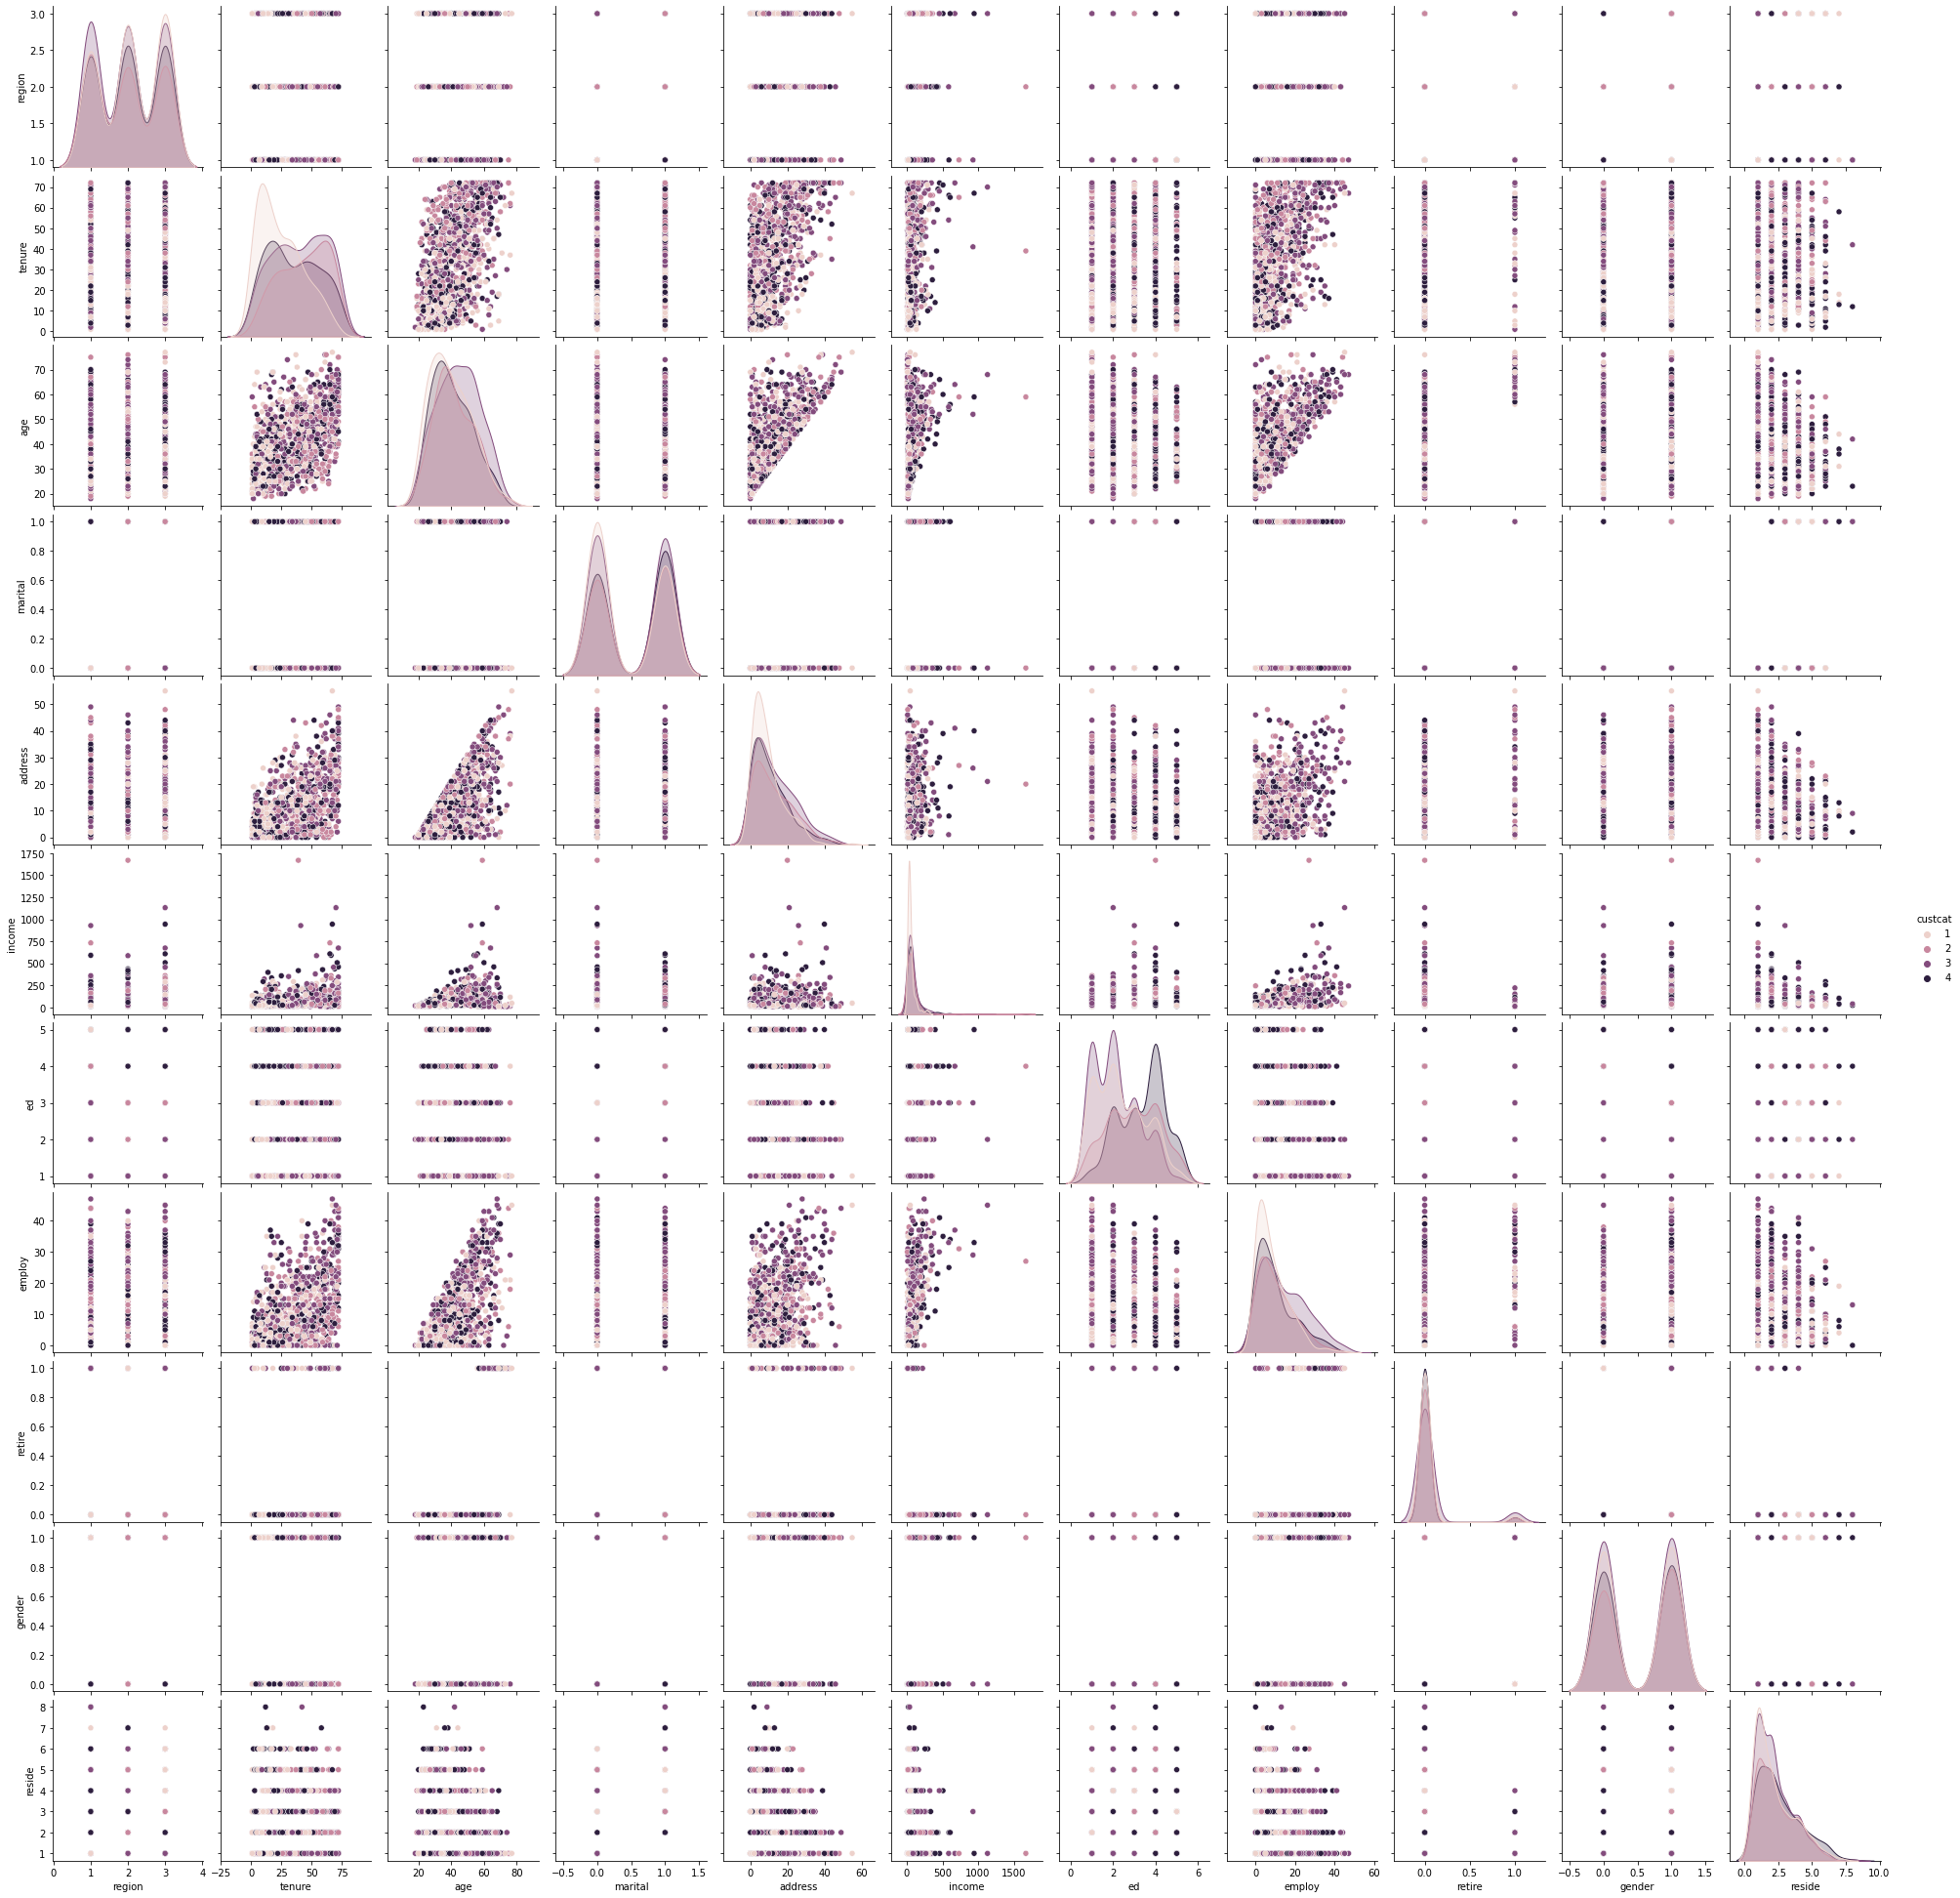

In [78]:
sns.pairplot(df,hue='custcat')

In [82]:
X = df.drop(['custcat'],axis=1)
y = df['custcat']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [89]:
best_score = 999

for i in range(0,1000):
    knn = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
    knn_predict = knn.predict(X_test)
    
    score = accuracy_score(y_test,knn_predict)
    
    if best_score>score:
        best_score = score
best_score

0.28

<h2>Decision Tree</h2>

In [141]:
import pandas as pd
import numpy as np 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

In [108]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head(5)

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [109]:
my_data.shape

(200, 6)

In [127]:
X = my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = my_data['Drug']


X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [128]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_col = preprocessing.LabelEncoder()
le_col.fit(['NORMAL','HIGH'])
X[:,3] = le_col.transform(X[:,3])

X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [144]:
model = DecisionTreeClassifier().fit(X_train,y_train)
score = model.score(X_test,y_test)
score

1.0

In [145]:
model_predict = model.predict(X_test)
model_predict

array(['drugX', 'drugY', 'drugX', 'drugX', 'drugC', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugA', 'drugC', 'drugX', 'drugX', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugB', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugY', 'drugA', 'drugY', 'drugY'], dtype=object)

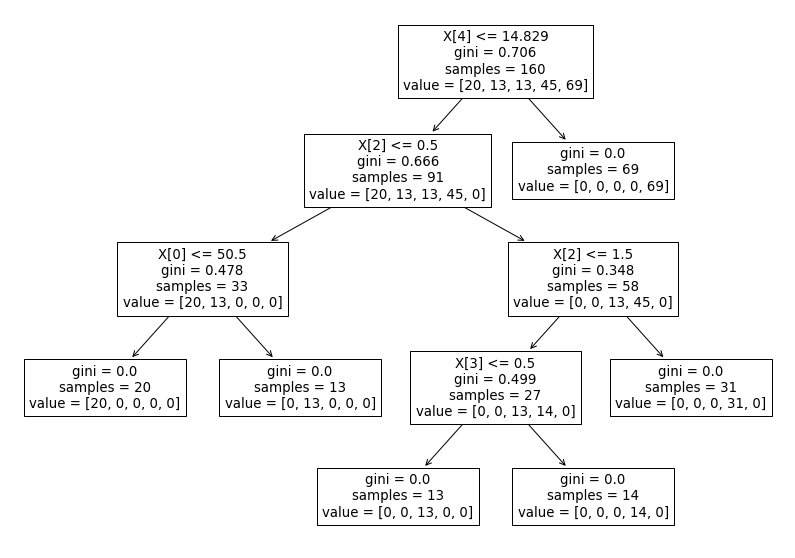

In [146]:
plt.figure(figsize=(14,10))
plot_tree(model)
plt.show()

In [142]:
print(f'evaluation model : {accuracy_score(model_predict,y_test)}')

evaluation model : 1.0


<h1>Logistic Regresion</h1>

In [161]:
import pandas as pd
import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from skle

import matplotlib.pyplot as plt
import seaborn as sns


In [151]:
df = pd.read_csv('./Downloads/ChurnData.csv')
df.head(5)

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  

[5 rows x 28 columns]

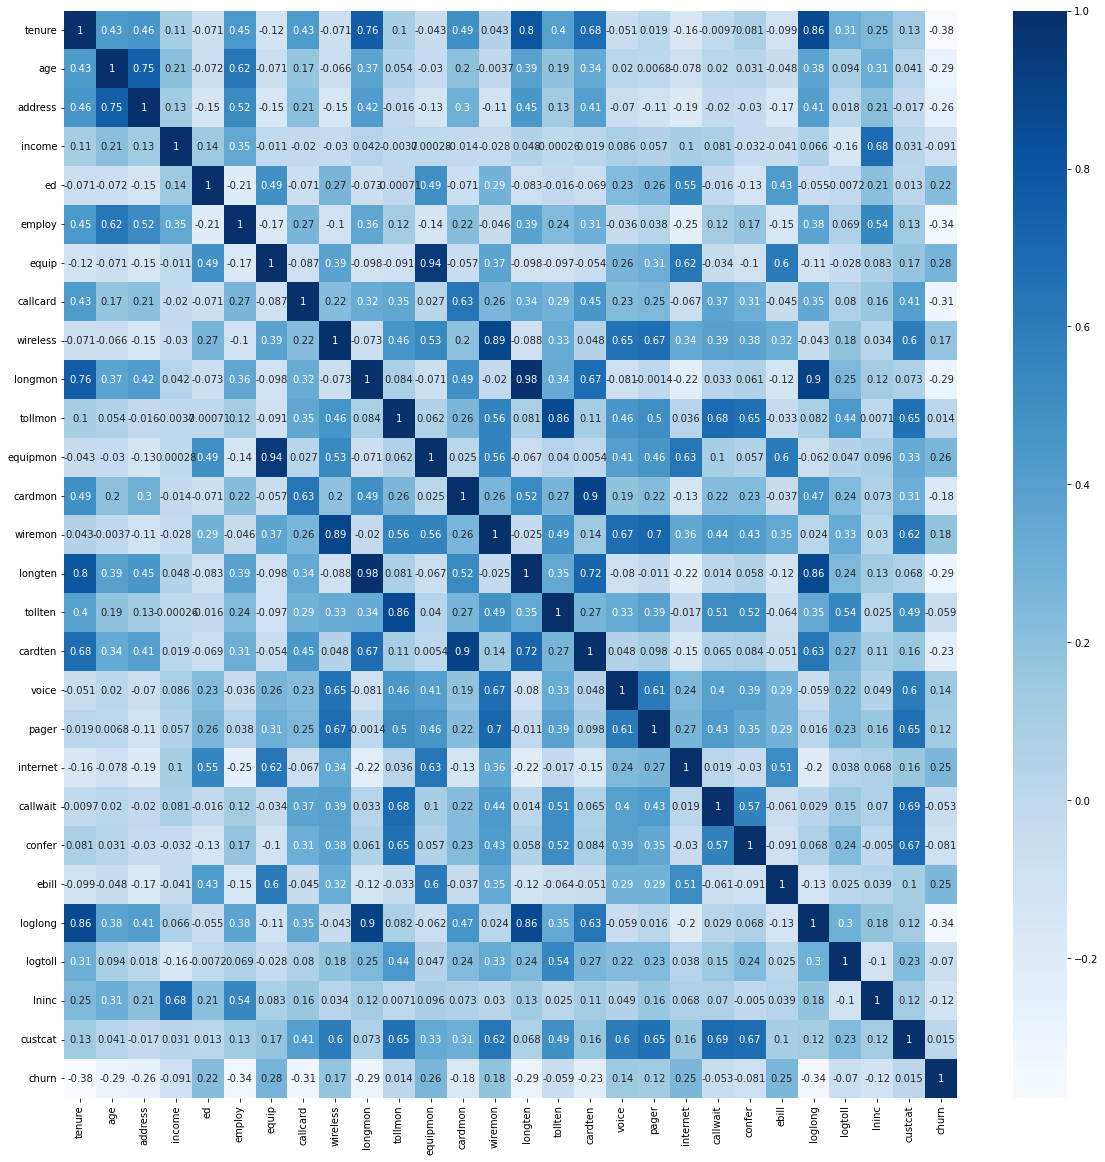

In [157]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [171]:
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = df['churn']

In [172]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [174]:
model = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

In [175]:
yhat = model.predict(X_test)

In [177]:
yhat_prob = model.predict_proba(X_test)

In [179]:
cnf_matrix = confusion_matrix(y_test,yhat)
cnf_matrix

array([[26,  5],
       [ 2,  7]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

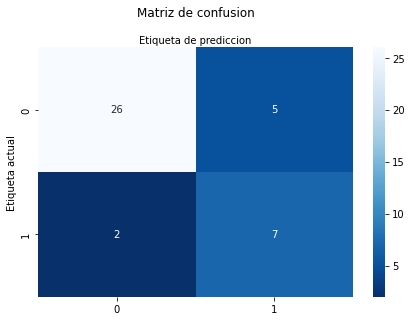

In [180]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names),
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot = True, cmap= 'Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion',y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

<h1>SVM</h1>
which is used for Classification as well as Regression problems.
However, primarily, it is used for Classification problemas in machine learning.
<br>
the goal of the <b>SVM</b> algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that easily put the new data point in the correct category in the future. this best decision boundary is called a hyperplane.

In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,jaccard_score


In [30]:
df = pd.read_csv('./Downloads/cell_samples.csv')
df

ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0    1000025      5         1          1        1            2       1   
1    1002945      5         4          4        5            7      10   
2    1015425      3         1          1        1            2       2   
3    1016277      6         8          8        1            3       4   
4    1017023      4         1          1        3            2       1   
..       ...    ...       ...        ...      ...          ...     ...   
694   776715      3         1          1        1            3       2   
695   841769      2         1          1        1            2       1   
696   888820      5        10         10        3            7       3   
697   897471      4         8          6        4            3       4   
698   897471      4         8          8        5            4       5   

     BlandChrom  NormNucl  Mit  Class  
0             3         1    1      2  
1             3         2    1      2  
2             3         1    1      2  
3             3         7    1      2  
4             3         1    1      2  
..          ...       ...  ...    ...  
694           1         1    1      2  
695           1         1    1      2  
696           8        10    2      4  
697          10         6    1      4  
698          10         4    1      4  

[699 rows x 11 columns]

<Figure size 1440x1440 with 0 Axes>

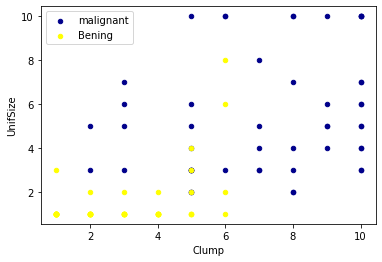

In [74]:
plt.figure(figsize=(20,20))
ax= df[df['Class'] == 4][:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Darkblue',label='malignant')
df[df['Class'] == 2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label='Bening',ax=ax)
plt.show()


In [31]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:
df.BareNuc.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [40]:
#replace '?' values to '0' and object type to int type
df.BareNuc = df.BareNuc.replace(['?'],'0')
df.BareNuc = df.BareNuc.astype('int64')

**select features and target**

In [51]:
X = df.drop(['Class'],axis=1)
y = df.Class

***train/test data***

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

model = svm.SVC(kernel='rbf').fit(X_train,y_train)
y_hat = model.predict(X_test)
y_hat[:50]

In [80]:
#result  f1 score
score = f1_score(y_test,y_hat,average='weighted')
score

0.5431106777181861

In [83]:
#result jaccard_score
score_two = jaccard_score(y_test,y_hat,pos_label=2)
score_two

0.6742857142857143

<h1>Clustering</h1>
****Objetives
<li>K-Means Clustering plus Advantages & Disadvantages </li>
<li>Hierarchical Clustering plus Advantages & Disadvantages 
</li>
<li>Measuring| the Distances Between Clusters - Single Linkage Clustering 
</li>
<li>Measuring the Distances Between Clusters - Algorithms for Hierarchy Clustering 
</li>
<li>Density-Based Clustering
</li>

<h4>In machine learning, we often gorup as a first step to understand a subject(dataset) in a machine learning system. Grouping unlabeled expamples is called clustering.</h4>

<h2>Clustering applications</h2>
<br>
<b style='color : orange'>Retail/Marketing</b>
<li style='color : blue'>Identifying buying patterns of customers</li>
<li style='color : blue'>Recommending new books or movies to new customes</li>
<br>
<b style='color : orange'>Banking</b>
<li style='color : blue'>Fraud detection in creid card use</li>
<li style='color : blue'>Indentifying cluster of costumers</li>
<br>
<b style='color : orange'>Insurance</b>
<li style='color : blue'>Fraud detection in claims analysis</li>
<li style='color : blue'>insurance risk of customers</li>
<br>
<b style='color : orange'>Publication</b>
<li style='color : blue'>Auto-categorizing new based on their content</li>
<li style='color : blue'>recommendding similar new articles</li>
<br>
<b style='color : orange'>Medicine</b>
<li style='color : blue'>Characterizing patient behavior</li>
<br>
<b style='color : orange'>Biology</b>
<li style='color : blue'>Clustering genetic markers to identify family ties</li>
<br>
<h2>Why clustering</h2>
<li>Exploratory data analysis</li>
<li>Summary generation</li>
<li>Outlier detection</li>
<li>Finding duplicates</li>
<li>Pre-processing step</li>

<h1>K-means</h1>

<h3>clustering algorithm</h3>
<p>1. Randomly placing <i>k</i> centroids, one for each cluster.</p>
<p>2. Calculate the distance of each point from each centroid.</p>
<p>3. Assing each data point(Object) to its closest centroid, creating a cluster.</p>
<p>4. Recalculate the position of the <i>k</i> centroids.</p>
<p>5. Repeat the steps 2-4, until the centroids no longer move.</p>
<br>
<h3>Accuracy</h3>
<p>1. <b>External approach</b>: Compare the cluster with the ground truth, if it is available.</p>
<p>2. <b>Internal approach</b> : Average the distante between data points within a cluster.</p>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('./Downloads/cc_general.csv')
data.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#delete 'CUST_ID' column
data.drop(['CUST_ID'],axis=1,inplace=True)

In [6]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
#replace null data to median 
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())

In [8]:
#data clear
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.449450  3638.612411  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   864.206542  2330.588021   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   170.857654   335.628312   864.206542   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

/Users/patodev/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patodev/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patodev/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

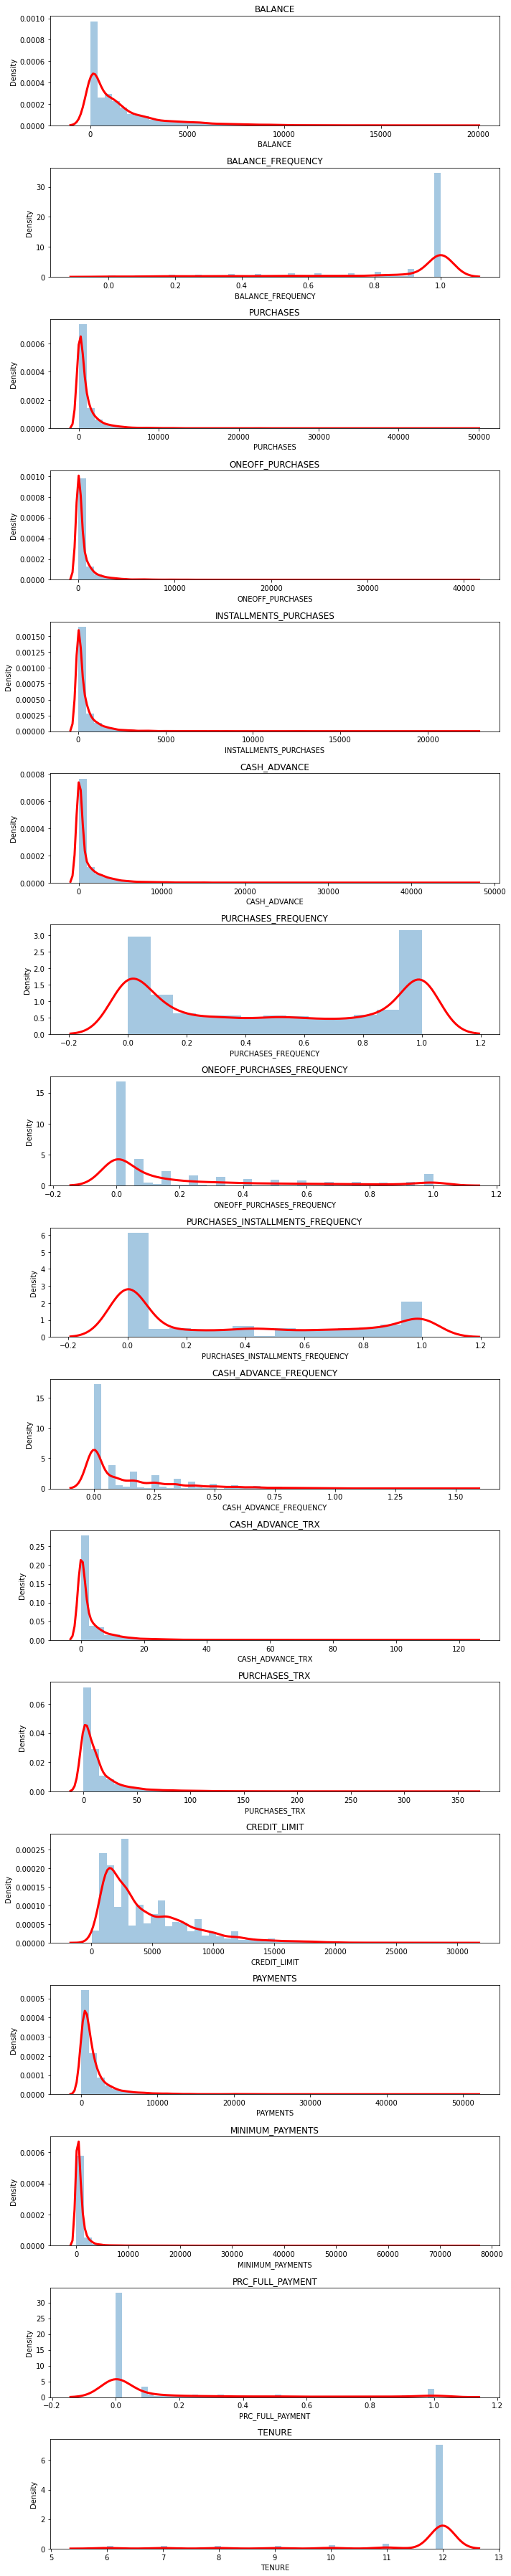

In [10]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(data[data.columns[i]],kde_kws={"color" : "r","lw" : 3,"label":"KDE"})
    plt.title(data.columns[i])
plt.tight_layout()

In [11]:
#corr
corr = data.corr()
corr

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

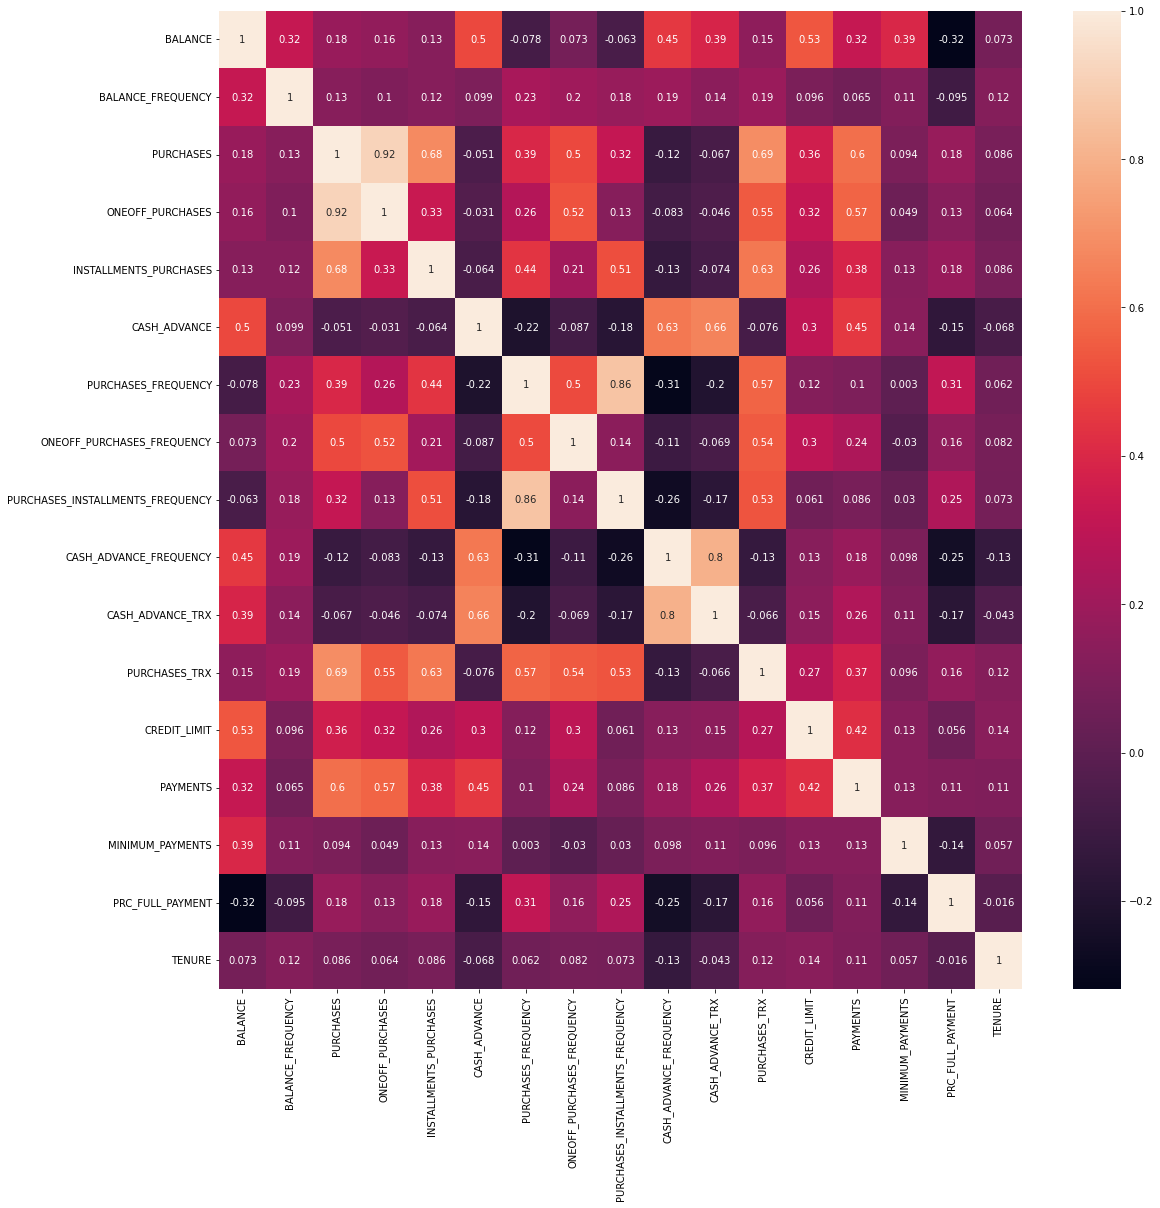

In [12]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [13]:
#we using StandarScaler
df_scaled = StandardScaler().fit_transform(data)
df_scaled.shape

(8950, 17)

In [14]:
#aplication of model
kmeans = KMeans(n_clusters=7).fit(df_scaled)
labels = kmeans.labels_

kmeans.cluster_centers_.shape

(7, 17)

In [15]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,
                              columns=[data.columns])

In [16]:
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.335506         -0.348076 -0.284525        -0.208973   
1  0.143500          0.431135  0.970854         0.921646   
2  1.673463          0.394706 -0.200037        -0.147209   
3  0.009775          0.401685 -0.342983        -0.223240   
4 -0.369378          0.332929 -0.041468        -0.231648   
5 -0.701902         -2.132123 -0.306810        -0.230441   
6  1.502824          0.406491  7.310815         6.389959   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.288475     0.065539           -0.198735   
1               0.602326    -0.305442            1.099825   
2              -0.202626     2.000605           -0.449749   
3              -0.400737    -0.100657           -0.813847   
4               0.327355    -0.369269            0.974848   
5              -0.301971    -0.323320           -0.546352   
6               5.543973     0.015522            1.072591   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.272572                        -0.230755   
1                   1.878444                         0.546029   
2                  -0.184767                        -0.399161   
3                  -0.334473                        -0.757772   
4                  -0.346438                         1.164445   
5                  -0.427903                        -0.440665   
6                   1.833619                         1.037771   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.304112        -0.002216     -0.385586    -0.556898   
1              -0.405175        -0.315484      1.226679     0.718373   
2               1.913344         1.929396     -0.235513     1.014230   
3               0.090228        -0.037133     -0.465306    -0.299864   
4              -0.478783        -0.363421      0.169933    -0.275485   
5              -0.522507        -0.376982     -0.416118    -0.172908   
6              -0.319186        -0.117442      4.843666     2.228858   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.390701        -0.209383         0.012899 -3.193765  
1  0.410684        -0.030199         0.468678  0.307390  
2  0.839121         0.555354        -0.391184  0.067842  
3 -0.245492        -0.015068        -0.451799  0.272242  
4 -0.224018        -0.031095         0.298305  0.253311  
5 -0.202079        -0.257633         0.296505  0.201050  
6  5.034193         1.184700         0.806631  0.331183

In [17]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([2, 1, 0, ..., 5, 5, 5], dtype=int32)

In [18]:
#df_cluster = pd.concat([data, pd.DataFrame({'Cluster':labels})], axis = 1)


df_cluster = data.copy()
df_cluster['Cluster'] = y_kmeans
df_cluster.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        864.206542          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        2

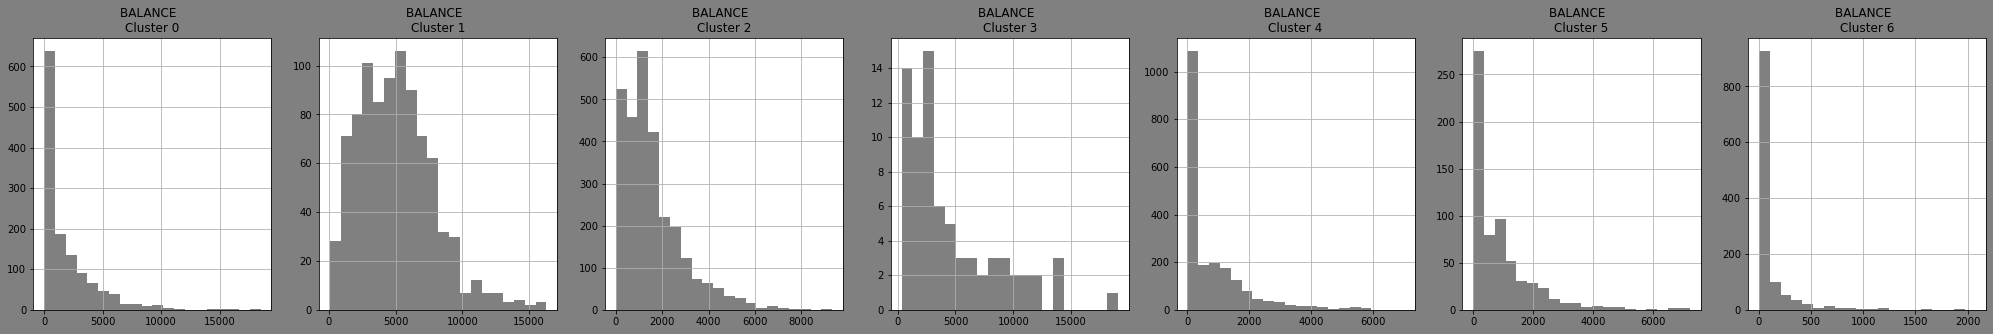

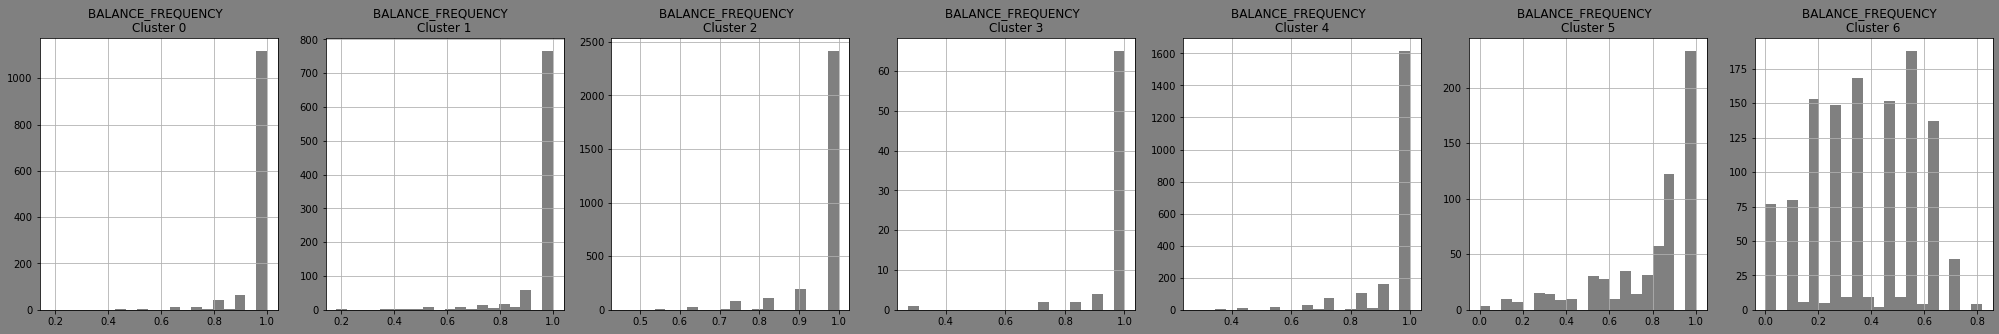

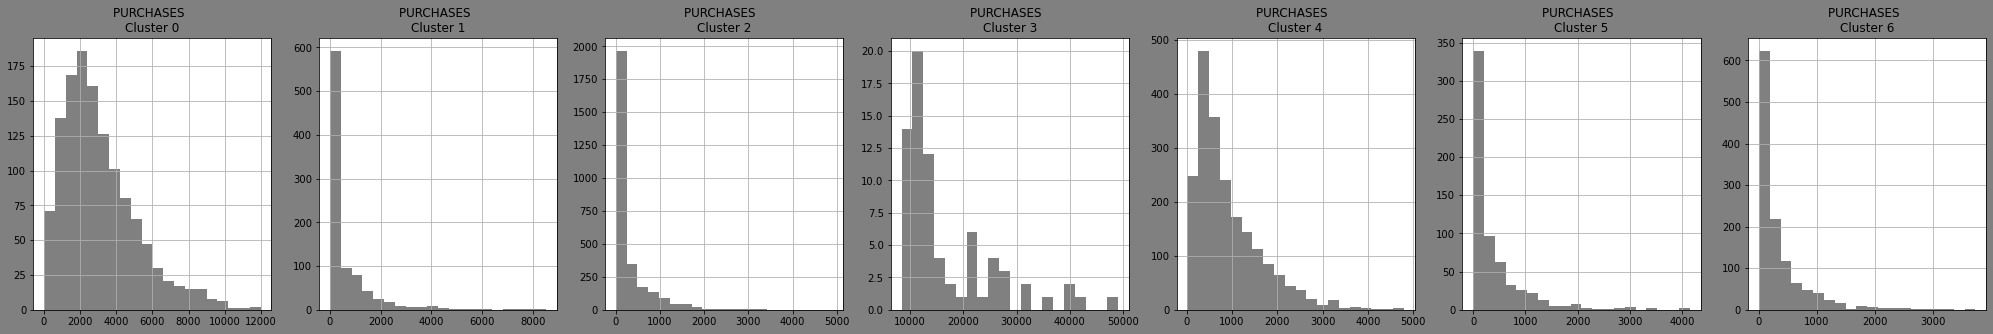

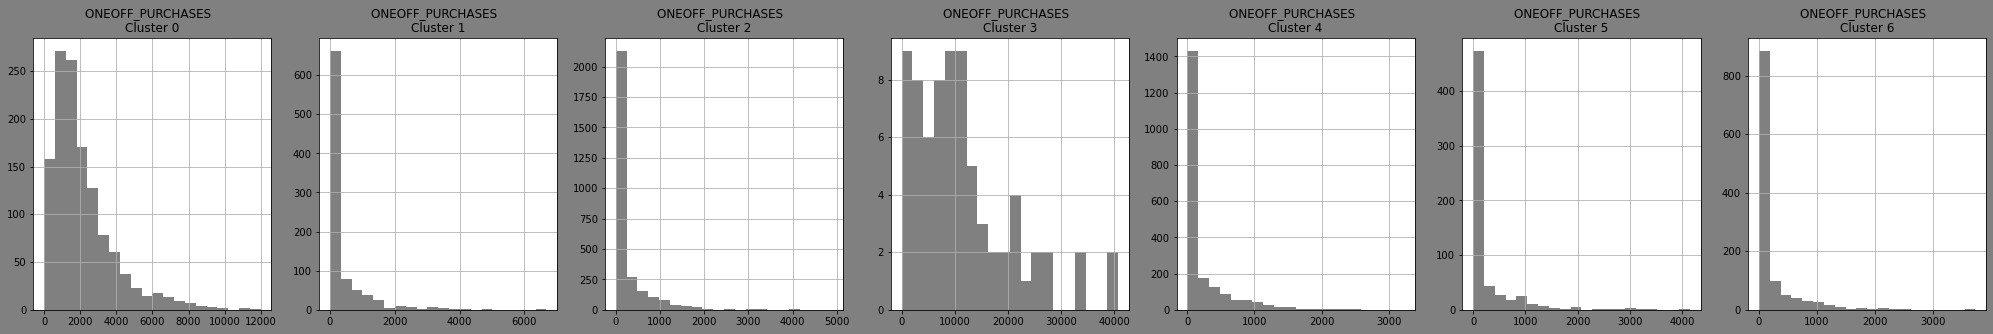

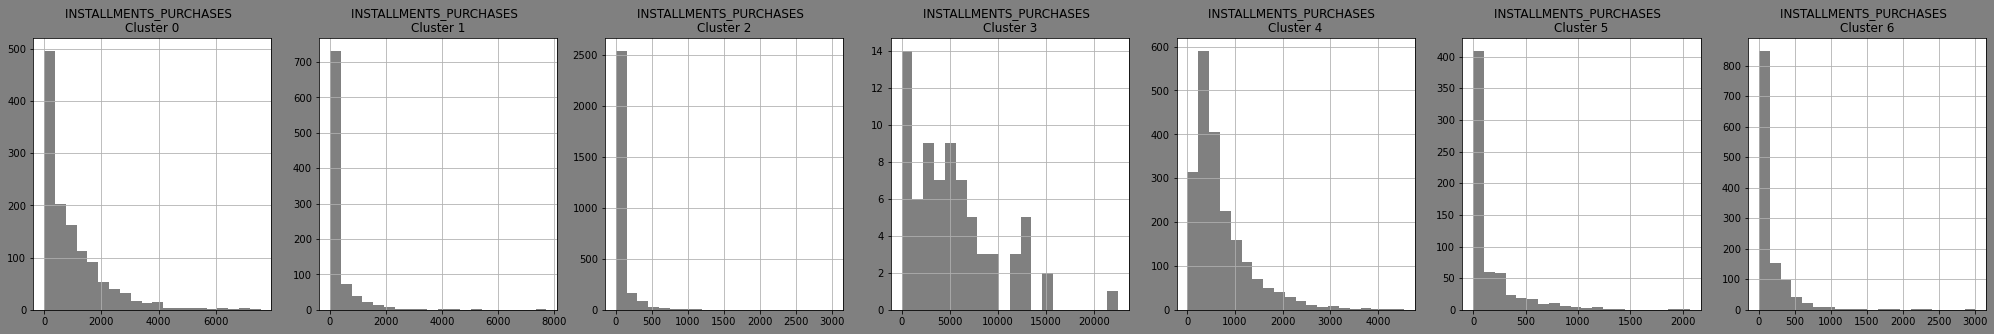

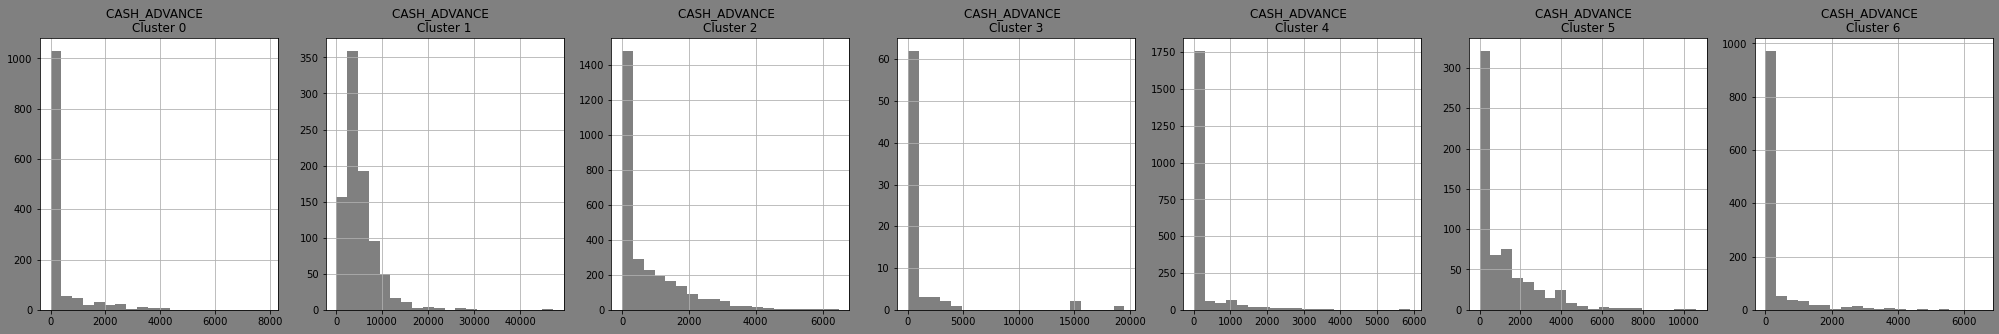

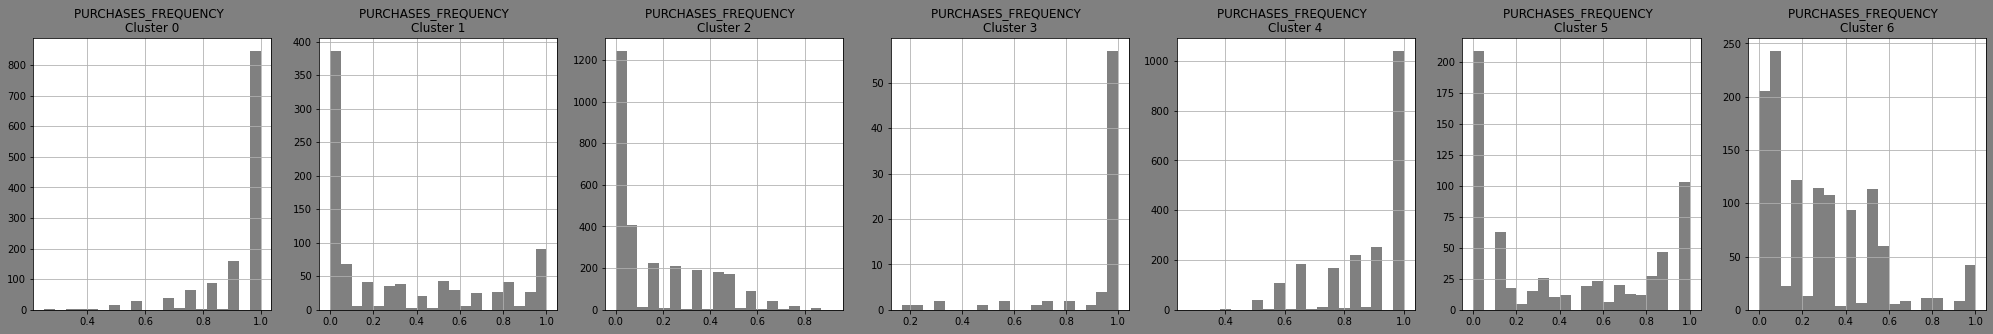

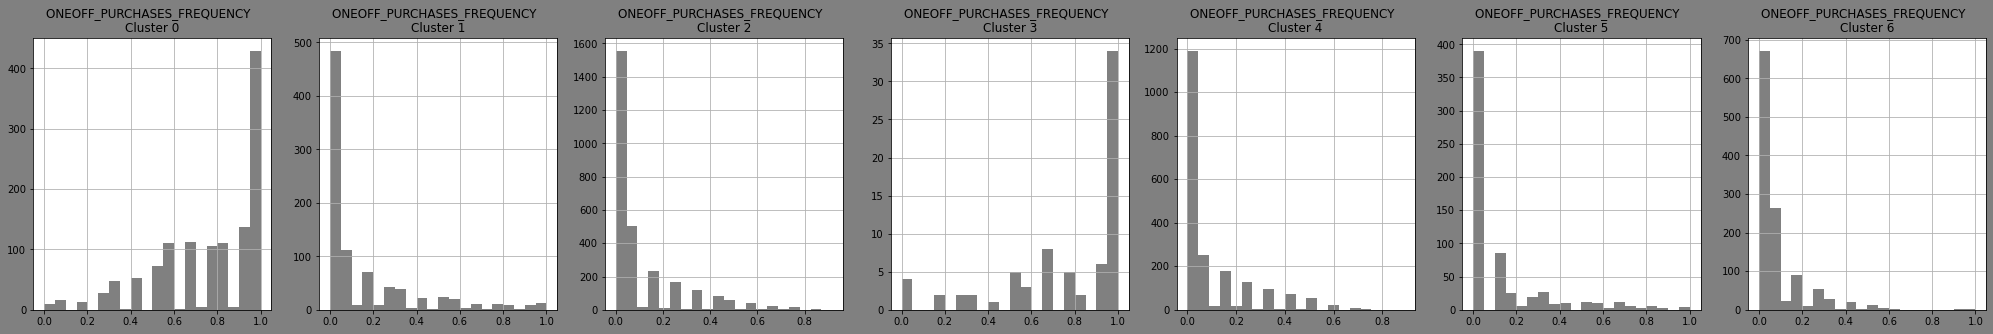

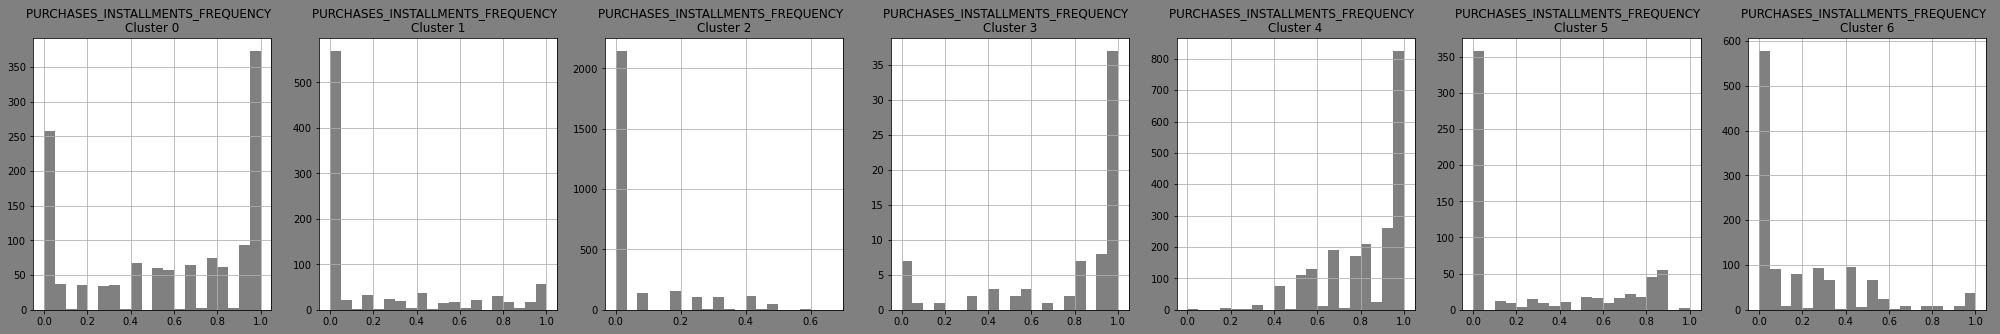

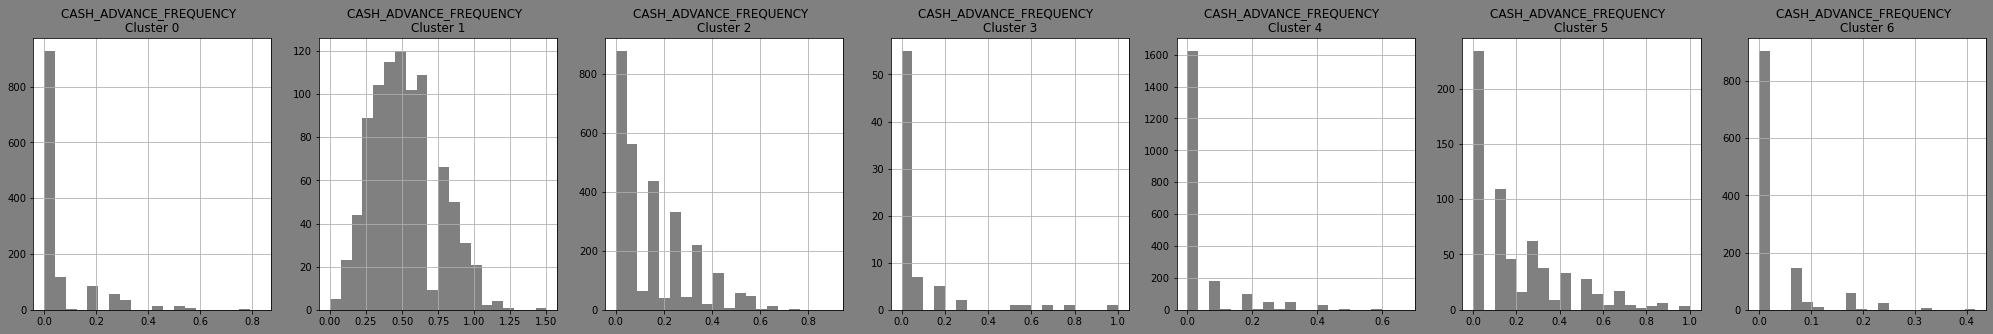

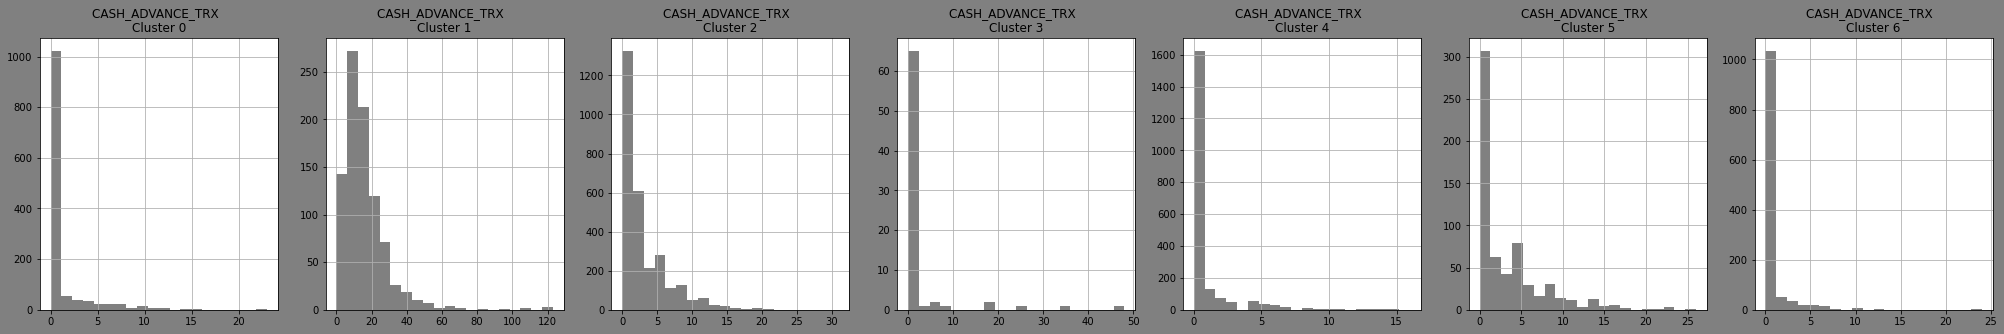

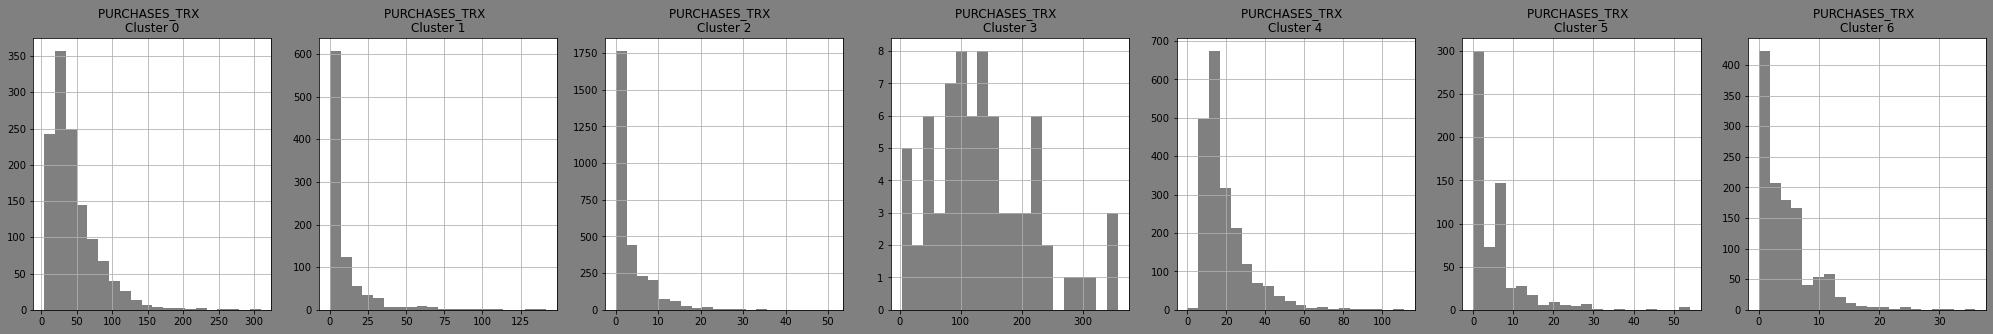

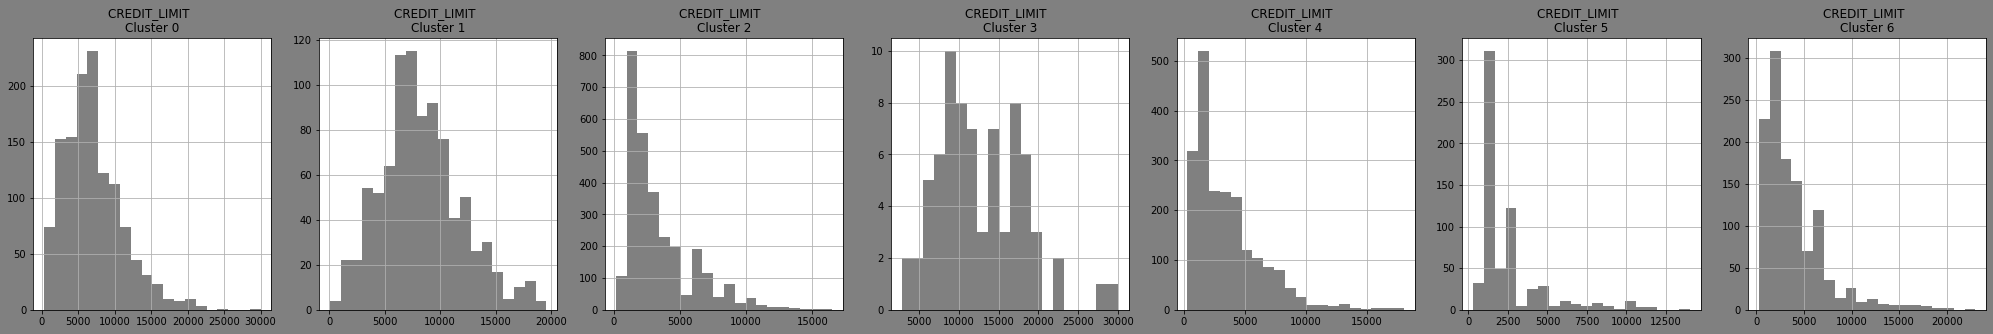

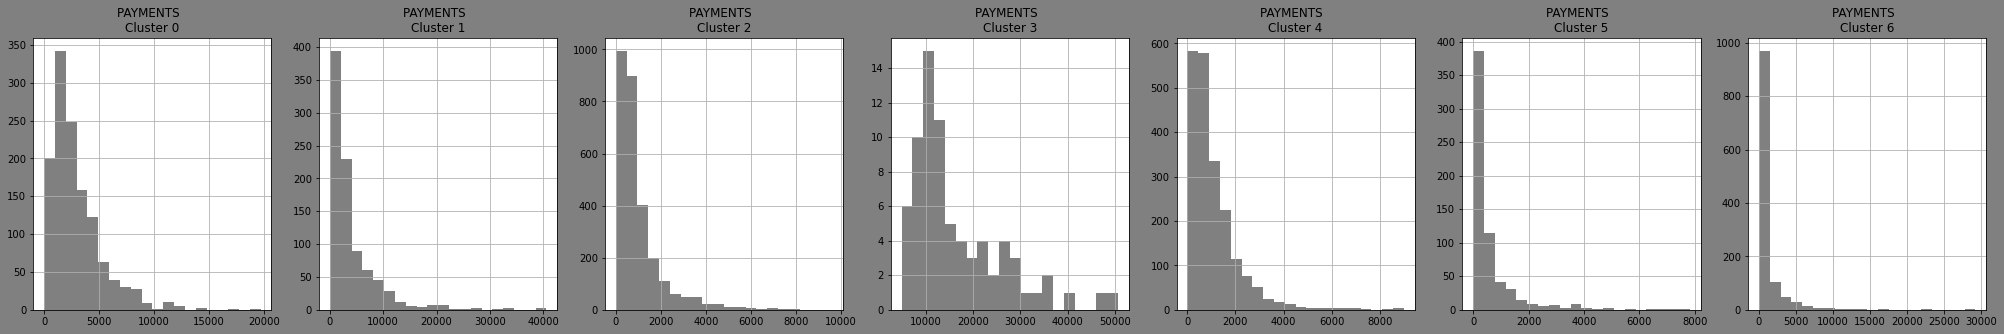

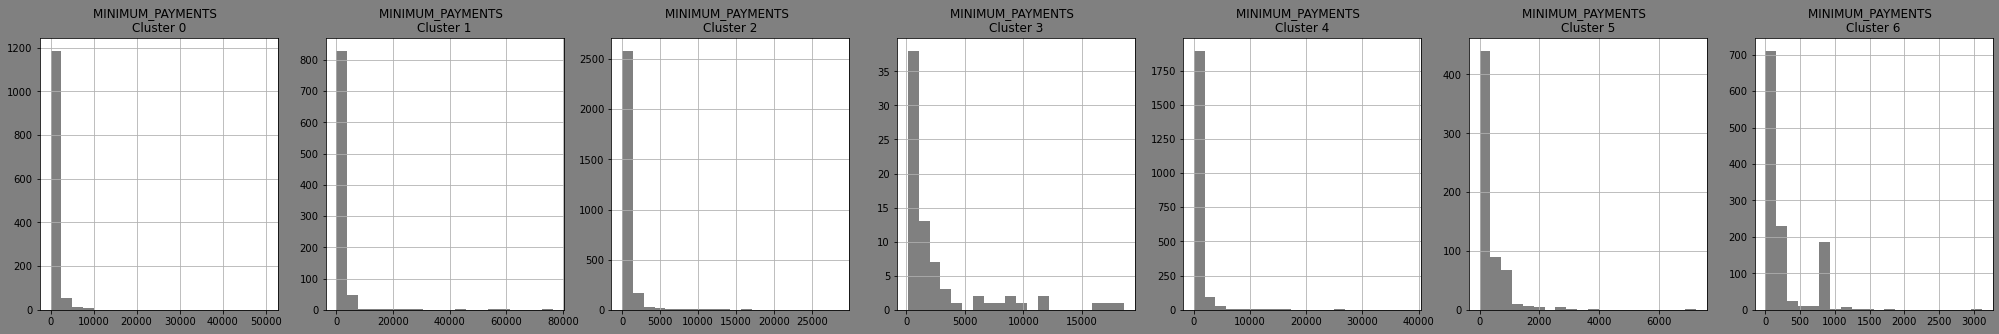

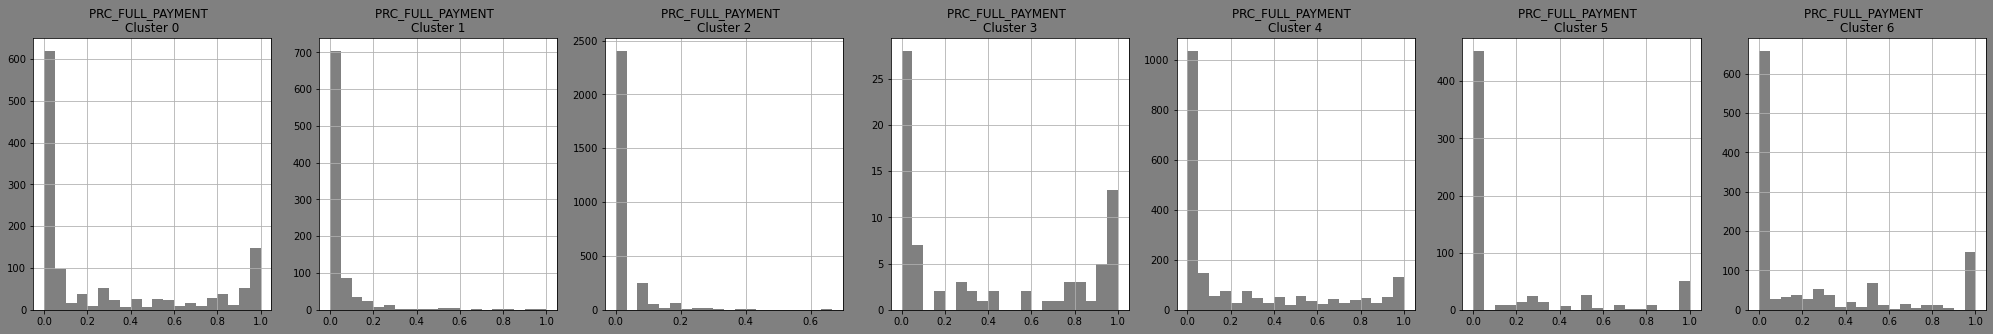

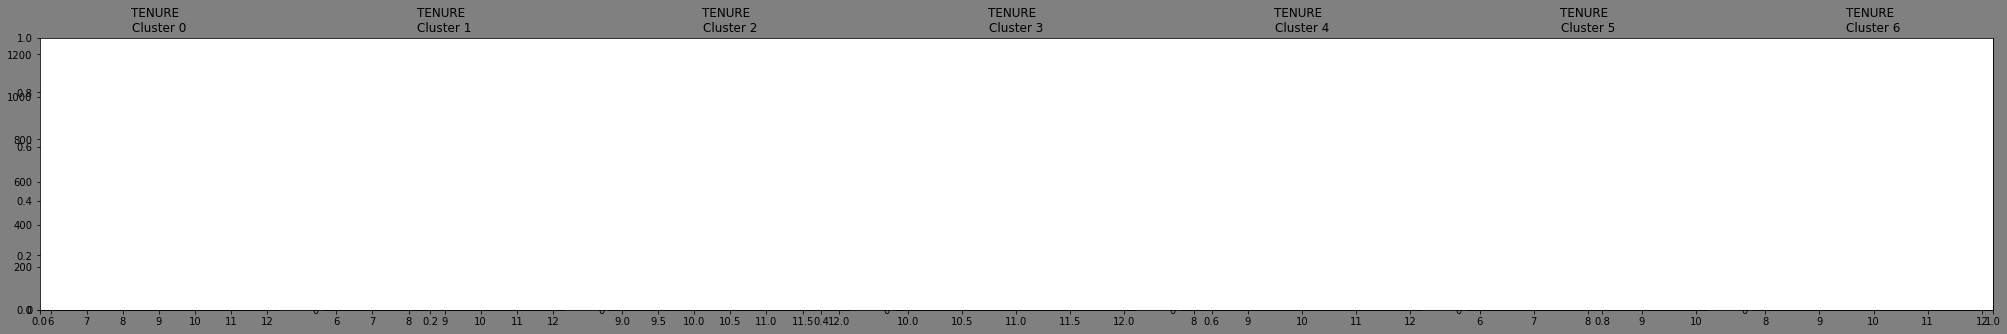

In [19]:
for i in data.columns:
    plt.figure(figsize=(35,5), facecolor='grey')
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = df_cluster[df_cluster['Cluster'] == j]
        cluster[i].hist(bins = 20, color = 'grey', lw = 3)  
        plt.title('{}  \nCluster {}'.format(i,j), fontsize = 12)
ax = plt.axes()
        
plt.show();

In [20]:
pca = PCA(n_components=2)
principal_com = pca.fit_transform(df_scaled)
principal_com

array([[-1.68221961, -1.07643588],
       [-1.1382902 ,  2.5065428 ],
       [ 0.96967992, -0.3835697 ],
       ...,
       [-0.9262047 , -1.81079331],
       [-2.33655   , -0.65794384],
       [-0.55642153, -0.40047397]])

In [21]:
pca_df = pd.DataFrame(data=principal_com,columns=['PCA1','PCA2'])
pca_df.head()

PCA1      PCA2
0 -1.682220 -1.076436
1 -1.138290  2.506543
2  0.969680 -0.383570
3 -0.873627  0.043175
4 -1.599434 -0.688571

In [22]:
pca_df["Cluster"] = labels
pca_df.head()

PCA1      PCA2  Cluster
0 -1.682220 -1.076436        3
1 -1.138290  2.506543        2
2  0.969680 -0.383570        1
3 -0.873627  0.043175        3
4 -1.599434 -0.688571        3

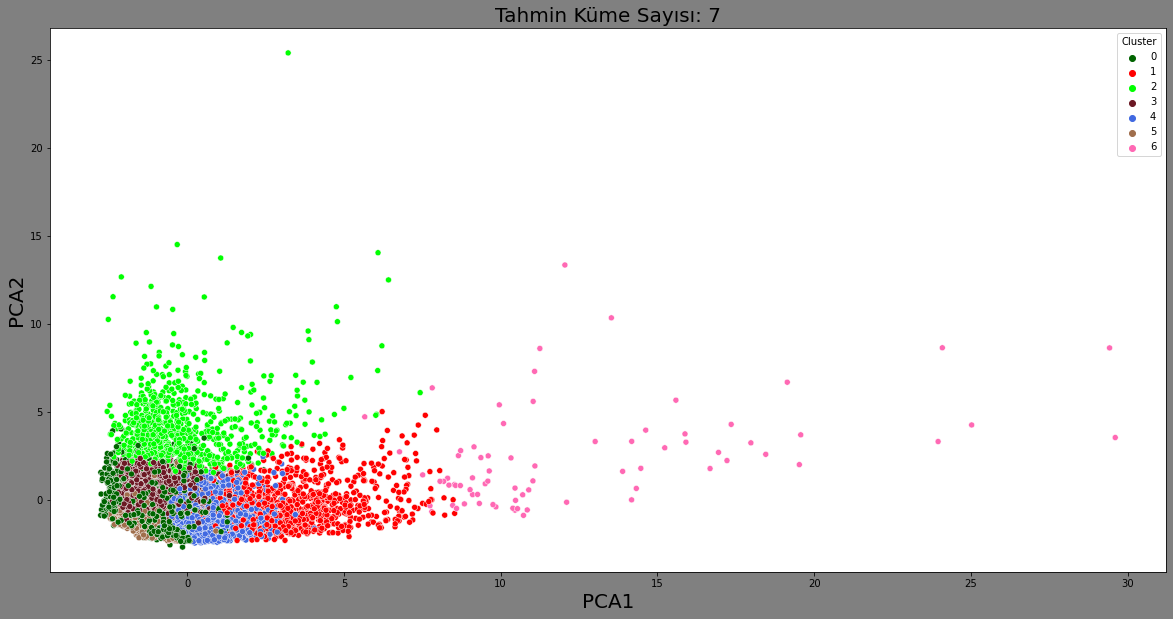

In [23]:
plt.figure(figsize = (20,10), facecolor= 'grey')
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', 
                     data=pca_df, 
                     palette = ['darkgreen', 'red', 'lime', '#6b1824', 
                                'royalblue', '#a06e4c', 'hotpink'])
plt.title('Tahmin Küme Sayısı: 7', fontsize = 20)
plt.xlabel("PCA1", fontsize= 20)
plt.ylabel("PCA2", fontsize= 20)
plt.show();

In [24]:
import plotly.express as px
pca = PCA(3)
pca.fit(df_scaled)
pca.explained_variance_ratio_[:4].sum()

0.5638400798941305

In [25]:
pca_data = pca.transform(df_scaled)
pca_df2 = pd.DataFrame(pca_data).iloc[:,:4]
pca_df2.columns = list(map(lambda x: f'PCA{x+1}', pca_df2.columns))
pca_df2.head().style.background_gradient(cmap='RdGy')

In [26]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(pca_df2)
out = kmeans.predict(pca_df2)

fig = px.scatter_3d(pca_df2,x="PCA1",y="PCA2",z="PCA3",
                    color=out,
                    title='KMeans kümesi k=7')


fig.show()

<h1>Hierarchical Clustering</h1>

<p>Hierachial clustering algorithms build a hierachy of cluster where each node is a cluster consists of the clusters of its daughter nodes.</p>

<li><b>Divise</b>: is top down, so you start with all observations in a large cluster and break.</li>
<li><b>Agglomerative</b>: is the opposite of divise, so it is bottom-up, where each observation.</li>

<h1>Recommender Systems</h1>
<li>The purpose and mechanisim of recommendation systems.</li>
<li>The different types of recommender systems.</li>
<li>How to implement recommender system on a real dataset.</li>
<br>
<h2>Advantages of recommender systems</h2>
<li>Broader exposure</li>
<li>Possibility of continual usage of purcghase of products</li>
<li>Provides better experience</li>
<br>
<h2>Two types of recommender systems</h2>
<img src='https://miro.medium.com/max/1064/1*mz9tzP1LjPBhmiWXeHyQkQ.png' />

<h1>Content-bases</h1>

In [27]:
import pandas as pd 
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#storing the movie information into a pandas df
movies_df = pd.read_csv('./Downloads/movies.csv')
#storing the user information into a panadas df
ratings_df = pd.read_csv('./Downloads/ratings.csv')
movies_df.head(5)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [57]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [58]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [61]:
##Using regular expressions to find a year stored between parentheses
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/3221143777.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres year  
0  Adventure|Animation|Children|Comedy|Fantasy  NaN  
1                   Adventure|Children|Fantasy  NaN  
2                               Comedy|Romance  NaN  
3                         Comedy|Drama|Romance  NaN  
4                                       Comedy  NaN

In [62]:
#Every genre is separated by a | so we simply have to call the split function on |
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                              genres year  
0  [Adventure, Animation, Children, Comedy, Fantasy]  NaN  
1                     [Adventure, Children, Fantasy]  NaN  
2                                  [Comedy, Romance]  NaN  
3                           [Comedy, Drama, Romance]  NaN  
4                                           [Comedy]  NaN

In [64]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies_df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                              genres  year  Adventure  \
0  [Adventure, Animation, Children, Comedy, Fantasy]     0        1.0   
1                     [Adventure, Children, Fantasy]     0        1.0   
2                                  [Comedy, Romance]     0        0.0   
3                           [Comedy, Drama, Romance]     0        0.0   
4                                           [Comedy]     0        0.0   

   Animation  Children  Comedy  Fantasy  Romance  ...  Horror  Mystery  \
0        1.0       1.0     1.0      1.0      0.0  ...     0.0      0.0   
1        0.0       1.0     0.0      1.0      0.0  ...     0.0      0.0   
2        0.0       0.0     1.0      0.0      1.0  ...     0.0      0.0   
3        0.0       0.0     1.0      0.0      1.0  ...     0.0      0.0   
4        0.0       0.0     1.0      0.0      0.0  ...     0.0      0.0   

   Sci-Fi  IMAX  Documentary  War  Musical  Western  Film-Noir  \
0     0.0   0.0          0.0  0.0      0.0      0.0        0.0   
1     0.0   0.0          0.0  0.0      0.0      0.0        0.0   
2     0.0   0.0          0.0  0.0      0.0      0.0        0.0   
3     0.0   0.0          0.0  0.0      0.0      0.0        0.0   
4     0.0   0.0          0.0  0.0      0.0      0.0        0.0   

   (no genres listed)  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 24 columns]

In [46]:
#ratings df
ratings_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [47]:
#drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop(['timestamp'],axis=1)
ratings_df.head(5)

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [65]:
#implement content based
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

title  rating
0  Breakfast Club, The     5.0
1            Toy Story     3.5
2              Jumanji     2.0
3         Pulp Fiction     5.0
4                Akira     4.5

In [66]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/2071048360.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/2071048360.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



movieId                title  rating
0        1            Toy Story     3.5
1        2              Jumanji     2.0
2      296         Pulp Fiction     5.0
3     1274                Akira     4.5
4     1968  Breakfast Club, The     5.0

In [67]:
#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

movieId                title  \
0           1            Toy Story   
1           2              Jumanji   
293       296         Pulp Fiction   
1246     1274                Akira   
1885     1968  Breakfast Club, The   

                                                 genres  year  Adventure  \
0     [Adventure, Animation, Children, Comedy, Fantasy]     0        1.0   
1                        [Adventure, Children, Fantasy]     0        1.0   
293                    [Comedy, Crime, Drama, Thriller]     0        0.0   
1246             [Action, Adventure, Animation, Sci-Fi]     0        1.0   
1885                                    [Comedy, Drama]     0        0.0   

      Animation  Children  Comedy  Fantasy  Romance  ...  Horror  Mystery  \
0           1.0       1.0     1.0      1.0      0.0  ...     0.0      0.0   
1           0.0       1.0     0.0      1.0      0.0  ...     0.0      0.0   
293         0.0       0.0     1.0      0.0      0.0  ...     0.0      0.0   
1246        1.0       0.0     0.0      0.0      0.0  ...     0.0      0.0   
1885        0.0       0.0     1.0      0.0      0.0  ...     0.0      0.0   

      Sci-Fi  IMAX  Documentary  War  Musical  Western  Film-Noir  \
0        0.0   0.0          0.0  0.0      0.0      0.0        0.0   
1        0.0   0.0          0.0  0.0      0.0      0.0        0.0   
293      0.0   0.0          0.0  0.0      0.0      0.0        0.0   
1246     1.0   0.0          0.0  0.0      0.0      0.0        0.0   
1885     0.0   0.0          0.0  0.0      0.0      0.0        0.0   

      (no genres listed)  
0                    0.0  
1                    0.0  
293                  0.0  
1246                 0.0  
1885                 0.0  

[5 rows x 24 columns]

In [68]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/2641803640.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/2641803640.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/2641803640.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/2641803640.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



Adventure  Animation  Children  Comedy  Fantasy  Romance  Drama  Action  \
0        1.0        1.0       1.0     1.0      1.0      0.0    0.0     0.0   
1        1.0        0.0       1.0     0.0      1.0      0.0    0.0     0.0   
2        0.0        0.0       0.0     1.0      0.0      0.0    1.0     0.0   
3        1.0        1.0       0.0     0.0      0.0      0.0    0.0     1.0   
4        0.0        0.0       0.0     1.0      0.0      0.0    1.0     0.0   

   Crime  Thriller  Horror  Mystery  Sci-Fi  IMAX  Documentary  War  Musical  \
0    0.0       0.0     0.0      0.0     0.0   0.0          0.0  0.0      0.0   
1    0.0       0.0     0.0      0.0     0.0   0.0          0.0  0.0      0.0   
2    1.0       1.0     0.0      0.0     0.0   0.0          0.0  0.0      0.0   
3    0.0       0.0     0.0      0.0     1.0   0.0          0.0  0.0      0.0   
4    0.0       0.0     0.0      0.0     0.0   0.0          0.0  0.0      0.0   

   Western  Film-Noir  (no genres listed)  
0      0.0        0.0                 0.0  
1      0.0        0.0                 0.0  
2      0.0        0.0                 0.0  
3      0.0        0.0                 0.0  
4      0.0        0.0                 0.0

In [69]:
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

In [70]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [71]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/789887408.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/789887408.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/789887408.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/789887408.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



Adventure  Animation  Children  Comedy  Fantasy  Romance  Drama  \
movieId                                                                    
1              1.0        1.0       1.0     1.0      1.0      0.0    0.0   
2              1.0        0.0       1.0     0.0      1.0      0.0    0.0   
3              0.0        0.0       0.0     1.0      0.0      1.0    0.0   
4              0.0        0.0       0.0     1.0      0.0      1.0    1.0   
5              0.0        0.0       0.0     1.0      0.0      0.0    0.0   

         Action  Crime  Thriller  Horror  Mystery  Sci-Fi  IMAX  Documentary  \
movieId                                                                        
1           0.0    0.0       0.0     0.0      0.0     0.0   0.0          0.0   
2           0.0    0.0       0.0     0.0      0.0     0.0   0.0          0.0   
3           0.0    0.0       0.0     0.0      0.0     0.0   0.0          0.0   
4           0.0    0.0       0.0     0.0      0.0     0.0   0.0          0.0   
5           0.0    0.0       0.0     0.0      0.0     0.0   0.0          0.0   

         War  Musical  Western  Film-Noir  (no genres listed)  
movieId                                                        
1        0.0      0.0      0.0        0.0                 0.0  
2        0.0      0.0      0.0        0.0                 0.0  
3        0.0      0.0      0.0        0.0                 0.0  
4        0.0      0.0      0.0        0.0                 0.0  
5        0.0      0.0      0.0        0.0                 0.0

In [72]:
genreTable.shape

(34208, 20)

In [73]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

In [74]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

movieId
5018      0.748252
26093     0.734266
27344     0.720280
148775    0.685315
6902      0.678322
dtype: float64

In [75]:
#The final recommendation table
movies_df.loc[movies_df['movieId'].isin(recommendationTable_df.head(20).keys())]

movieId                                              title  \
664        673                                          Space Jam   
1824      1907                                              Mulan   
2902      2987                           Who Framed Roger Rabbit?   
4923      5018                                           Motorama   
6793      6902                                      Interstate 60   
8605     26093         Wonderful World of the Brothers Grimm, The   
8783     26340  Twelve Tasks of Asterix, The (Les douze travau...   
9296     27344  Revolutionary Girl Utena: Adolescence of Utena...   
9825     32031                                             Robots   
11716    51632                            Atlantis: Milo's Return   
11751    51939                TMNT (Teenage Mutant Ninja Turtles)   
13250    64645                                  The Wrecking Crew   
16055    81132                                             Rubber   
18312    91335                                      Gruffalo, The   
22778   108540           Ernest & Célestine (Ernest et Célestine)   
22881   108932                                     The Lego Movie   
25218   117646                     Dragonheart 2: A New Beginning   
26442   122787                                       The 39 Steps   
32854   146305                             Princes and Princesses   
33509   148775                Wizards of Waverly Place: The Movie   

                                                  genres year  
664    [Adventure, Animation, Children, Comedy, Fanta...  NaN  
1824   [Adventure, Animation, Children, Comedy, Drama...  NaN  
2902   [Adventure, Animation, Children, Comedy, Crime...  NaN  
4923   [Adventure, Comedy, Crime, Drama, Fantasy, Mys...  NaN  
6793   [Adventure, Comedy, Drama, Fantasy, Mystery, S...  NaN  
8605   [Adventure, Animation, Children, Comedy, Drama...  NaN  
8783   [Action, Adventure, Animation, Children, Comed...  NaN  
9296   [Action, Adventure, Animation, Comedy, Drama, ...  NaN  
9825   [Adventure, Animation, Children, Comedy, Fanta...  NaN  
11716  [Action, Adventure, Animation, Children, Comed...  NaN  
11751  [Action, Adventure, Animation, Children, Comed...  NaN  
13250  [Action, Adventure, Comedy, Crime, Drama, Thri...  NaN  
16055  [Action, Adventure, Comedy, Crime, Drama, Film...  NaN  
18312    [Adventure, Animation, Children, Comedy, Drama]  NaN  
22778  [Adventure, Animation, Children, Comedy, Drama...  NaN  
22881  [Action, Adventure, Animation, Children, Comed...  NaN  
25218  [Action, Adventure, Comedy, Drama, Fantasy, Th...  NaN  
26442  [Action, Adventure, Comedy, Crime, Drama, Thri...  NaN  
32854  [Animation, Children, Comedy, Drama, Fantasy, ...  NaN  
33509  [Adventure, Children, Comedy, Drama, Fantasy, ...  NaN

<h1>Collaborative Filtering</h1>

In [81]:
#storing the movie information into a pandas df
movies_df = pd.read_csv('./Downloads/movies.csv')
#storing the user information into a panadas df
ratings_df = pd.read_csv('./Downloads/ratings.csv')
movies_df.head(5)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [82]:
##Using regular expressions to find a year stored between parentheses
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/2727439841.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



In [83]:
movies_df.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995

In [87]:
#Dropping the genres column
movies_df.drop(['genres'],axis=1)
movies_df.head()

movieId                        title  year
0        1                    Toy Story  1995
1        2                      Jumanji  1995
2        3             Grumpier Old Men  1995
3        4            Waiting to Exhale  1995
4        5  Father of the Bride Part II  1995

In [88]:
ratings_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [91]:
#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop(['timestamp'],axis= 1)
ratings_df.head()

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [92]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

title  rating
0  Breakfast Club, The     5.0
1            Toy Story     3.5
2              Jumanji     2.0
3         Pulp Fiction     5.0
4                Akira     4.5

In [93]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop(['year'], axis=1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

/var/folders/9_/ffwq6bwd5v780sbj368zf_zc0000gn/T/ipykernel_4629/2035672847.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



movieId                title  rating
0        1            Toy Story     3.5
1        2              Jumanji     2.0
2      296         Pulp Fiction     5.0
3     1274                Akira     4.5
4     1968  Breakfast Club, The     5.0

In [94]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

userId  movieId  rating
0         1        1     4.0
16        1      296     3.0
320       4      296     1.0
422       4     1968     4.0
516       5        1     4.0

In [95]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])

In [103]:
userSubsetGroup.count()

movieId  rating
userId                 
1             2       2
4             2       2
5             2       2
6             2       2
7             1       1
...         ...     ...
606           4       4
607           3       3
608           5       5
609           2       2
610           4       4

[419 rows x 2 columns]

In [104]:
userSubsetGroup.get_group(610)

userId  movieId  rating
99534     610        1     5.0
99552     610      296     5.0
99636     610     1274     5.0
99664     610     1968     4.0

In [105]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [106]:
userSubsetGroup[0:3]

[(91,
         userId  movieId  rating
  14121      91        1     4.0
  14122      91        2     3.0
  14173      91      296     4.5
  14316      91     1274     5.0
  14383      91     1968     3.0),
 (177,
         userId  movieId  rating
  24900     177        1     5.0
  24901     177        2     3.5
  24930     177      296     5.0
  25069     177     1274     2.0
  25129     177     1968     3.5),
 (219,
         userId  movieId  rating
  31524     219        1     3.5
  31525     219        2     2.5
  31554     219      296     4.0
  31628     219     1274     2.5
  31680     219     1968     3.0)]

In [107]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [108]:
pearsonCorrelationDict.items()

dict_items([(91, 0.43852900965351443), (177, 0.0), (219, 0.45124262819713973), (274, 0.716114874039432), (298, 0.9592712306918567), (414, 0.9376144618769914), (474, 0.11720180773462392), (477, 0.4385290096535153), (480, 0.7844645405527362), (483, 0.08006407690254357), (599, 0.7666866491579839), (608, 0.920736884379251), (50, 0.15713484026367722), (57, -0.7385489458759964), (68, 0.0), (103, 0.5222329678670935), (135, 0.8703882797784892), (182, 0.9428090415820635), (202, 0.5222329678670935), (217, 0.30151134457776363), (226, 0.9438798074485389), (288, 0.6005325641789633), (307, 0.9655810287305759), (318, 0.44486512077567225), (322, 0.5057805388588731), (330, 0.9035942578600878), (357, 0.5606119105813882), (434, 0.9864036607532465), (448, 0.30151134457776363), (469, 0.8164965809277261), (561, 0.5222329678670935), (600, 0.18442777839082938), (606, 0.9146591207600472), (610, -0.47140452079103173), (18, 1.0), (19, -0.5), (21, 0), (45, 0.5000000000000009), (63, -0.4999999999999982), (64, 0.0)

In [109]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

similarityIndex  userId
0         0.438529      91
1         0.000000     177
2         0.451243     219
3         0.716115     274
4         0.959271     298

In [110]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

similarityIndex  userId
43               1.0     132
181              1.0     382
219              1.0     602
130              1.0     130
129              1.0     125

In [111]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

similarityIndex  userId  movieId  rating
0              1.0     132        1     2.0
1              1.0     132       17     3.0
2              1.0     132       29     2.0
3              1.0     132       32     3.0
4              1.0     132       34     1.5

In [112]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

similarityIndex  userId  movieId  rating  weightedRating
0              1.0     132        1     2.0             2.0
1              1.0     132       17     3.0             3.0
2              1.0     132       29     2.0             2.0
3              1.0     132       32     3.0             3.0
4              1.0     132       34     1.5             1.5

In [113]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

sum_similarityIndex  sum_weightedRating
movieId                                         
1                       36.0               124.0
2                       18.0                58.0
3                        3.0                11.0
5                        3.0                 8.5
6                       13.0                49.5

In [114]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

weighted average recommendation score  movieId
movieId                                                
1                                     3.444444        1
2                                     3.222222        2
3                                     3.666667        3
5                                     2.833333        5
6                                     3.807692        6

In [115]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

weighted average recommendation score  movieId
movieId                                                
3035                                       5.0     3035
1956                                       5.0     1956
2522                                       5.0     2522
2495                                       5.0     2495
2477                                       5.0     2477
163386                                     5.0   163386
2455                                       5.0     2455
2450                                       5.0     2450
2427                                       5.0     2427
163112                                     5.0   163112

In [116]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

movieId                                        title  year
1873     1956                              Ordinary People  1980
2343     2427                           Thin Red Line, The  1998
2366     2450                              Howard the Duck  1986
2371     2455                                     Fly, The  1986
2393     2477                                   Firewalker  1986
2411     2495  Fantastic Planet, The (Planète sauvage, La)  1973
2438     2522                                  Airport '77  1977
2949     3035                               Mister Roberts  1955